In [1]:
import glob
import math
import sys
import timeit

sys.path.insert(0, '../../')
from visualize_dataset import *
from losses import *
from metrics import *
from predict import *
from train import *
from utils import *

Using TensorFlow backend.


In [2]:
path_train_images = '../../../data/stanford_t2_cropped/train/Slice/'
path_train_annotations = '../../../data/stanford_t2_cropped/train/ROI/'
path_train_predictions = './predictions.50e/train/'

path_val_images = '../../../data/stanford_t2_cropped/val/Slice/'
path_val_annotations = '../../../data/stanford_t2_cropped/val/ROI/'
path_val_predictions = './predictions.50e/val/'

path_test_images = '../../../data/stanford_t2_cropped/test/Slice/'
path_test_annotations = '../../../data/stanford_t2_cropped/test/ROI/'
path_test_predictions = './predictions.50e/test/'

path_save_weights = './weights.50e/'
path_load_weights = None

train_vgg = False
path_vgg_weights = '../../../data/vgg16_weights_th_dim_ordering_th_kernels.h5'

n_classes = 2
input_height = 224
input_width = 224
n_channel_annotations = 1

In [3]:
print('Number train images: ', len(glob.glob(path_train_images + '*.png')))
print('Number val images: ', len(glob.glob(path_val_images + '*.png')))
print('Number test images: ', len(glob.glob(path_test_images + '*.png')))

('Number train images: ', 728)
('Number val images: ', 36)
('Number test images: ', 35)


In [4]:
model_name = 'vgg_segnet'
epochs = 50
train_batch_size = 8
val_batch_size = len(glob.glob(path_val_images + '*.png'))

In [5]:
optimizer = 'adadelta'
metrics = ['accuracy', dice, iou]

class_props = calc_class_proportions(path_train_annotations, n_classes, n_channel_annotations)
class_weights = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations)
class_weights_log = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations, scale = 'log')

print(class_props)
print(class_weights)
print(class_weights_log)

loss = weighted_categorical_crossentropy_loss(class_weights_log)

[0.98302371 0.01697629]
[ 1.         57.90569446]
[0.01712204 4.07593777]


In [ ]:
start = timeit.default_timer()
train(
    path_train_images, path_train_annotations, train_batch_size, 
    path_val_images, path_val_annotations, val_batch_size,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights, path_vgg_weights = path_vgg_weights, train_vgg = train_vgg, path_load_weights = None
)
end = timeit.default_timer()

('Model output shape', (None, 50176, 2))
('Epoch', 0)
Epoch 1/1
91/91 [==============================] - 2062s 23s/step - loss: 0.0282 - acc: 0.5462 - dice: 0.0676 - iou: 0.0351 - val_loss: 0.0260 - val_acc: 0.6379 - val_dice: 0.0730 - val_iou: 0.0379
('Epoch', 1)
Epoch 1/1
91/91 [==============================] - 2369s 26s/step - loss: 0.0182 - acc: 0.6711 - dice: 0.0946 - iou: 0.0499 - val_loss: 0.0280 - val_acc: 0.6690 - val_dice: 0.0793 - val_iou: 0.0413
('Epoch', 2)
Epoch 1/1
91/91 [==============================] - 2377s 26s/step - loss: 0.0141 - acc: 0.7762 - dice: 0.1331 - iou: 0.0717 - val_loss: 0.0326 - val_acc: 0.7573 - val_dice: 0.0942 - val_iou: 0.0494
('Epoch', 3)
Epoch 1/1
91/91 [==============================] - 2399s 26s/step - loss: 0.0111 - acc: 0.8563 - dice: 0.1927 - iou: 0.1077 - val_loss: 0.0532 - val_acc: 0.8524 - val_dice: 0.0921 - val_iou: 0.0483
('Epoch', 4)
Epoch 1/1
91/91 [==============================] - 2386s 26s/step - loss: 0.0091 - acc: 0.9044 - dice:

In [ ]:
print('Total training time: ', end - start)

('Model output shape', (None, 50176, 2))
('Epoch', 25)
Epoch 1/1
91/91 [==============================] - 549s 6s/step - loss: 0.0350 - acc: 0.8928 - dice: 0.2496 - iou: 0.1573 - val_loss: 0.0954 - val_acc: 0.8644 - val_dice: 0.0975 - val_iou: 0.0512
('Epoch', 26)
Epoch 1/1
91/91 [==============================] - 543s 6s/step - loss: 0.0087 - acc: 0.8790 - dice: 0.2178 - iou: 0.1240 - val_loss: 0.1018 - val_acc: 0.8845 - val_dice: 0.0937 - val_iou: 0.0492
('Epoch', 27)
Epoch 1/1
91/91 [==============================] - 542s 6s/step - loss: 0.0051 - acc: 0.9195 - dice: 0.2979 - iou: 0.1783 - val_loss: 0.1111 - val_acc: 0.9115 - val_dice: 0.1011 - val_iou: 0.0532
('Epoch', 28)
Epoch 1/1
91/91 [==============================] - 541s 6s/step - loss: 0.0038 - acc: 0.9480 - dice: 0.3946 - iou: 0.2518 - val_loss: 0.0991 - val_acc: 0.9183 - val_dice: 0.1275 - val_iou: 0.0681
('Epoch', 29)
Epoch 1/1
91/91 [==============================] - 543s 6s/step - loss: 0.0030 - acc: 0.9636 - dice: 0.47

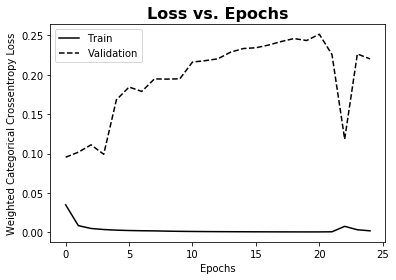

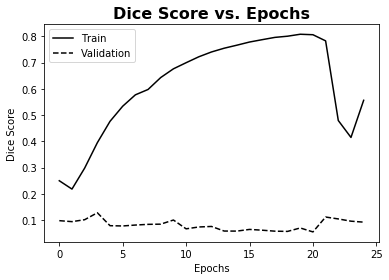

In [6]:
"""
resume_epoch = 26
path_load_weights = './weights.50e/.24'

train(path_train_images, path_train_annotations, train_batch_size, 
    path_val_images, path_val_annotations, val_batch_size,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics, 
    path_save_weights, path_vgg_weights = None, train_vgg = False, 
    path_load_weights = path_load_weights, resume_epoch = resume_epoch)
"""

In [6]:
epochs = 46

In [7]:
predict(
    path_train_images, path_train_annotations, path_train_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics, 
    path_save_weights
)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00  35908016
           1       0.69      1.00      0.81    620112

   micro avg       0.99      0.99      0.99  36528128
   macro avg       0.84      0.99      0.91  36528128
weighted avg       0.99      0.99      0.99  36528128

('F1/dice (binary): ', 0.8140677466396773)
('Jaccard/IOU: ', 0.6864369733878368)


In [ ]:
visualize_dataset(
    path_train_images, path_train_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_train_predictions
)

In [9]:
predict(
    path_val_images, path_val_annotations, path_val_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1779279
           1       0.08      0.04      0.05     27057

   micro avg       0.98      0.98      0.98   1806336
   macro avg       0.53      0.52      0.52   1806336
weighted avg       0.97      0.98      0.97   1806336

('F1/dice (binary): ', 0.054563985873094877)
('Jaccard/IOU: ', 0.028047175788293778)


In [ ]:
visualize_dataset(
    path_val_images, path_val_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_val_predictions
)

In [11]:
predict(
    path_test_images, path_test_annotations, path_test_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1714591
           1       0.29      0.07      0.11     41569

   micro avg       0.97      0.97      0.97   1756160
   macro avg       0.63      0.53      0.55   1756160
weighted avg       0.96      0.97      0.97   1756160

('F1/dice (binary): ', 0.11269628680680914)
('Jaccard/IOU: ', 0.05971285173605397)


In [ ]:
visualize_dataset(
    path_test_images, path_test_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations, 
    dir_predictions = path_test_predictions
)